# Chapter 9 Authoritarianism in an Ideologically Divided Era
## Chapter Structure

*	Changes over time in ideological distance from the parties by authoritarianism. This primarily consists of two figures, Figures 1 and 2.

*	Asymmetric effects of ideological proximity to parties on voting as a function of authoritarianism (Figures 3 and 4). This is the spatial analysis, with associated contour plots.

*	Authoritarianism predicts presidential voting more among those who perceive greater partisan polarization (Figures 5-6)

These three portions of the chapter form a cohesive unit and they focus very precisely on questions of ideological proximity and perceived ideological polarization. 

### Load Data

Below I load the data and dependencies. I also create a few variables that will be used in the analysis.


In [6]:
rm(list = ls())
library(brms)
library(modelr)
library(dplyr)
library(modelr)
library(tidybayes)
library(haven)
library(ggplot2)
library(dplyr)
library(cowplot)
library(metR)

load("/Users/Chris/Dropbox/github_repos/Authoritarianism_V2/authoritarianism_replication_docker/Chapter Analysis/Chapter 9 Analysis/ch9models.rda")

ggtheme <- theme(
  plot.title = element_text(face = "bold", hjust = 0, vjust = 0, colour = "#3C3C3C", size = 20),
  axis.text.x = element_text(size = 16, colour = "#535353", face = "bold"),
  axis.text.y = element_text(size = 16, colour = "#535353", face = "bold"),
  axis.title = element_text(size = 16, colour = "#535353", face = "bold"),
  axis.title.y = element_text(size = 16, colour = "#535353", face = "bold", vjust = 1.5),
  axis.ticks = element_blank(),
  strip.text.x = element_text(size = 16),
  panel.grid.major = element_line(colour = "#D0D0D0", size = .25),
  panel.background = element_rect(fill = "white"),
  legend.text = element_text(size = 14),
  legend.title = element_text(size = 16)
)

`summarise()` has grouped output by 'authoritarianism'. You can override using
the `.groups` argument.


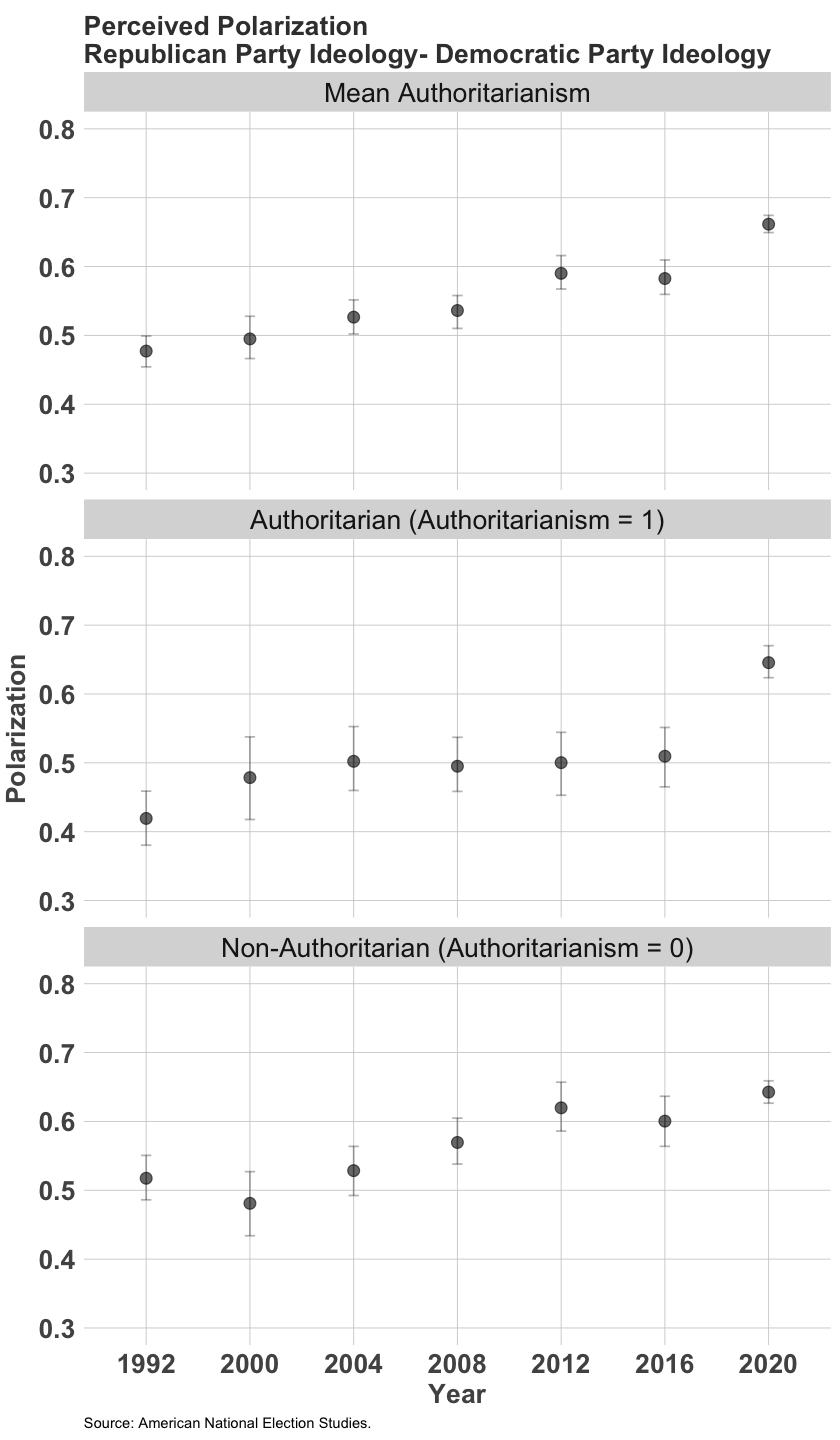

In [2]:
options(repr.plot.width = 7, repr.plot.height = 12)

average_data = ch9models[[1]] %>%
  select(ideol, authoritarianism, female, age, college, income, jewish, catholic, other, year) %>%
  na.omit() %>%
  group_by(year) %>% data_grid(female = mean(female), age = mean(age), college = mean(college), income = mean(income), catholic = mean(catholic), jewish = mean(jewish), other = mean(other), authoritarianism = mean(authoritarianism)) %>%
  mutate(authoritarianism2 = authoritarianism * authoritarianism) %>%
  add_epred_draws(ch9models[["polarization"]])  %>%
  group_by(year) %>%
  summarize(
    min = quantile(.epred, 0.025),
    med = quantile(.epred, 0.50),
    max = quantile(.epred, 0.975)) %>%
  mutate(authoritarianism = "Mean Authoritarianism")

disagg_data <- ch9models[[1]] %>%
  select(ideol, authoritarianism, female, age, college, income, jewish, catholic, other, year) %>%
  na.omit() %>%
  group_by(year) %>%
  data_grid(female = mean(female), age = mean(age), college = mean(college), income = mean(income), catholic = mean(catholic), jewish = mean(jewish), other = mean(other), authoritarianism = seq_range(authoritarianism, 2)) %>%
  mutate(authoritarianism2 = authoritarianism * authoritarianism) %>%
  add_epred_draws(ch9models[["polarization"]]) %>%
  group_by(authoritarianism, year) %>%
  summarize(
    min = quantile(.epred, 0.025),
    med = quantile(.epred, 0.50),
    max = quantile(.epred, 0.975)) %>%
    mutate(authoritarianism = ifelse(authoritarianism == 1, "Authoritarian (Authoritarianism = 1)", "Non-Authoritarian (Authoritarianism = 0)") )
    # Remove the authorirarianism column

# Combine the two datasets
rbind(average_data, disagg_data) %>%
#reorder the authoritarianism variable
mutate(authoritarianism = factor(authoritarianism, levels = c("Mean Authoritarianism", "Authoritarian (Authoritarianism = 1)", "Non-Authoritarian (Authoritarianism = 0)"))) %>%
    ggplot(aes(x = factor(year), y = med, ymin = min, ymax = max)) +
    facet_wrap(~ authoritarianism, ncol =1) +
           geom_point(size = 3, alpha = 0.60, position = position_dodge(width = 0.5)) +
           geom_errorbar(width = 0.10, alpha = 0.3, position = position_dodge(width = 0.5)) +
           ggtitle("Perceived Polarization\nRepublican Party Ideology- Democratic Party Ideology") +
           #Add a subtitle

           ylab("Polarization") +
           xlab("Year") +
           ggtheme +
           #Change the y axis limits from 0 to 0.8
            scale_y_continuous(limits = c(.3, 0.8)) +
            # Add a caption
            labs(caption = "Source: American National Election Studies.") +
            # alignt he caption to the left
            theme(plot.caption = element_text(hjust = 0)) +
            #Make the title smaller, and the second line should be smaller than the first
            theme(plot.title = element_text(size = 16, lineheight = 0.9))



In [415]:
# Predictions
ch9models[["filteredData"]]  %>%
  select(ideol, authoritarianism, female, age, college, income, jewish, catholic, other, year) %>%
  na.omit() %>%
  group_by(year) %>%
  data_grid(female = mean(female), age = mean(age), college = mean(college), income = mean(income), catholic = mean(catholic), jewish = mean(jewish), other = mean(other), authoritarianism = seq_range(authoritarianism, n = 2)) %>%
  mutate(authoritarianism2 = authoritarianism * authoritarianism) %>%
  add_linpred_draws(ch9models[["polarization"]] ) %>% summarize(
    mean(.linpred)
  )

`summarise()` has grouped output by 'year', 'female', 'age', 'college',
'income', 'catholic', 'jewish', 'other', 'authoritarianism',
'authoritarianism2'. You can override using the `.groups` argument.


year,female,age,college,income,catholic,jewish,other,authoritarianism,authoritarianism2,.row,mean(.linpred)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1992,0.4681404,0.3718466,0.3602081,0.4421326,0.2405722,0.03381014,0.1638492,0,0,1,0.5175180
1992,0.4681404,0.3718466,0.3602081,0.4421326,0.2405722,0.03381014,0.1638492,1,1,2,0.4189977
2000,0.5306122,0.3835884,0.4557823,0.3945578,0.2517007,0.04761905,0.2176871,0,0,3,0.4809493
2000,0.5306122,0.3835884,0.4557823,0.3945578,0.2517007,0.04761905,0.2176871,1,1,4,0.4781207
2004,0.5092784,0.3967526,0.4329897,0.4082474,0.2577320,0.03505155,0.1731959,0,0,5,0.5284384
2004,0.5092784,0.3967526,0.4329897,0.4082474,0.2577320,0.03505155,0.1731959,1,1,6,0.5033819
2008,0.5309201,0.4139894,0.3710407,0.3333333,0.1704374,0.02111614,0.2187029,0,0,7,0.5699584
2008,0.5309201,0.4139894,0.3710407,0.3333333,0.1704374,0.02111614,0.2187029,1,1,8,0.4960585
2012,0.5411559,0.4092820,0.4185639,0.3169877,0.2329247,0.03152364,0.4185639,0,0,9,0.6199345


These are the models without the interactions, followed with the interactions.

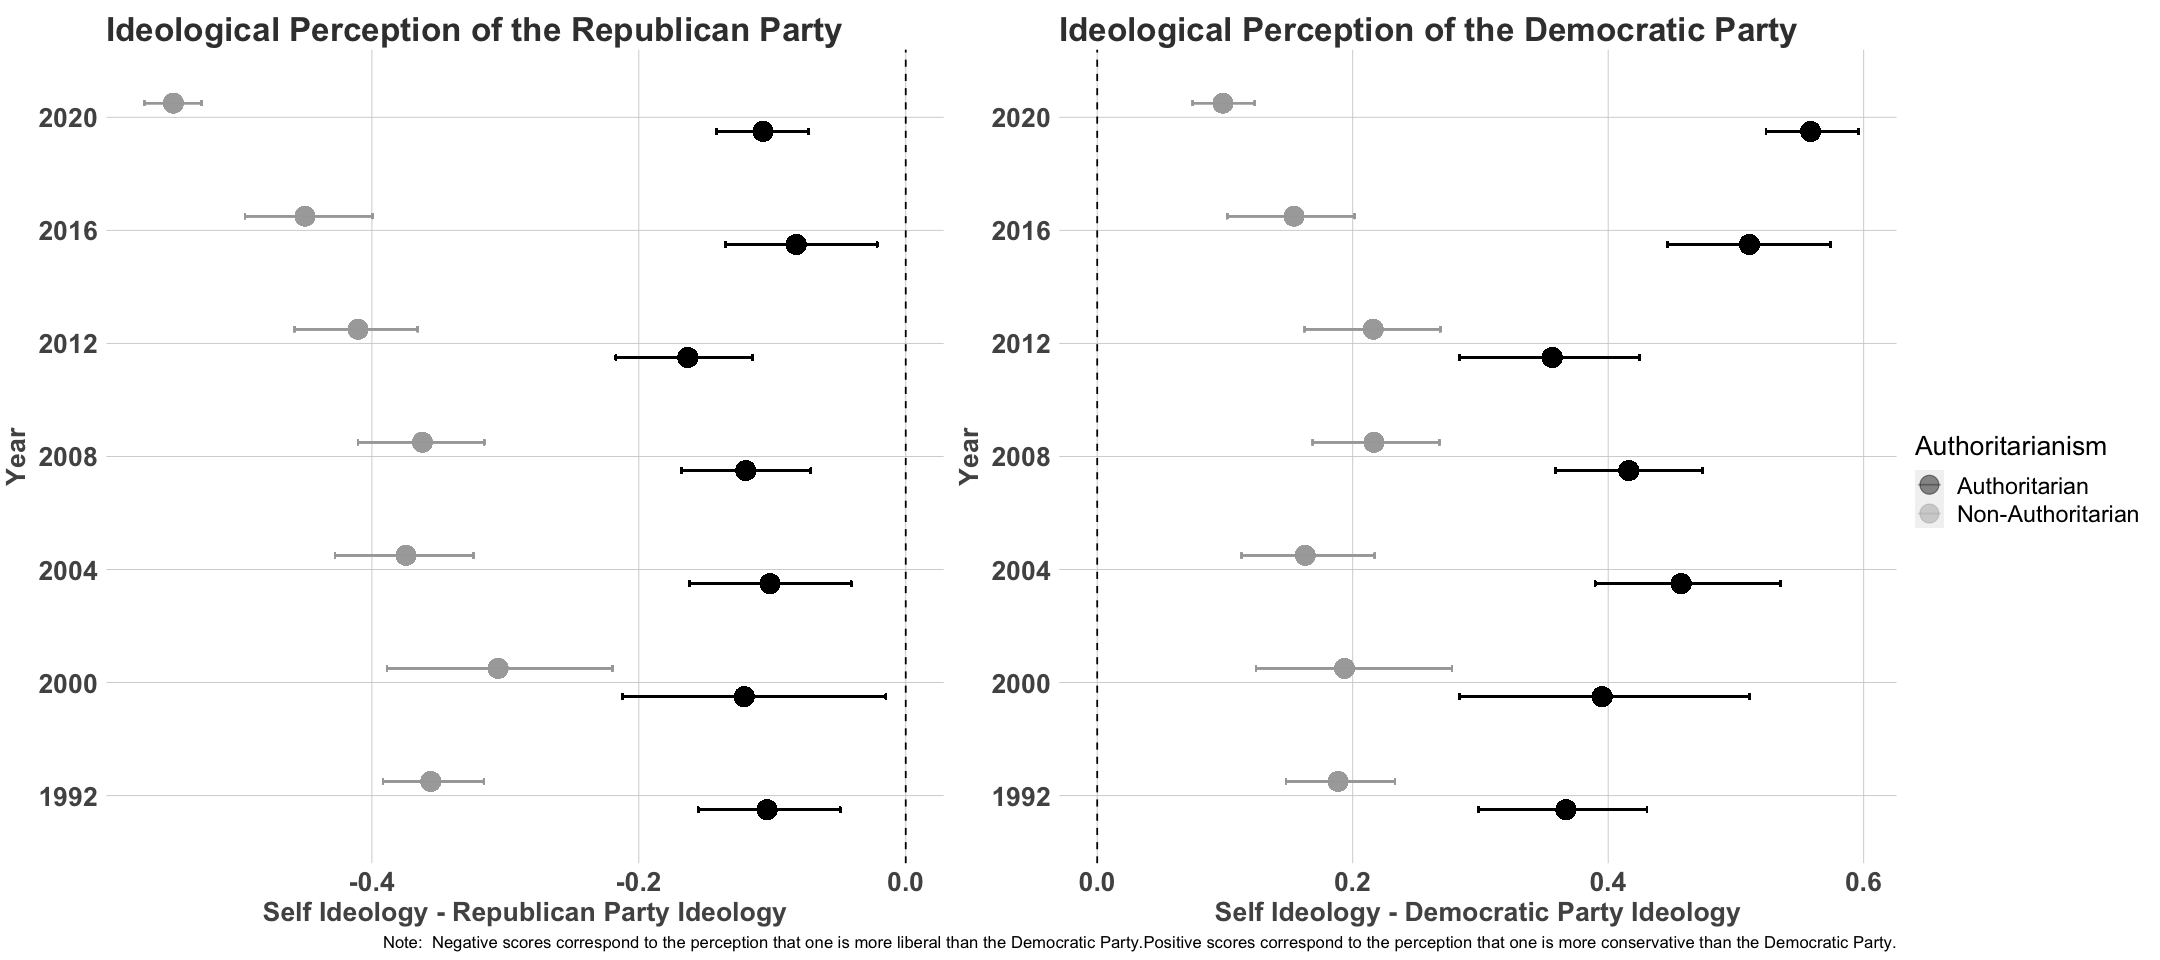

In [416]:
options(repr.plot.width = 18, repr.plot.height = 8)

plotting_data = ch9models [["filteredData"]] %>%
   select(differenceR1, differenceD1, authoritarianism, female, age, college, income, jewish, catholic, other, year) %>%
   na.omit() %>%
   group_by(year) %>%
   data_grid(female = mean(female), age = mean(age), college = mean(college), income = mean(income), catholic = mean(catholic), jewish = mean(jewish), other = mean(other), authoritarianism = seq_range(authoritarianism, n = 2)) %>%
   mutate(authoritarianism2 = authoritarianism * authoritarianism)

a = plotting_data  %>%
  add_linpred_draws(ch9models [["distanceRep"]])   %>%
  mutate(probability = .linpred) %>%
  group_by(authoritarianism, year) %>%
  mutate(min = quantile(probability, 0.025)) %>%
  mutate(med = quantile(probability, 0.50)) %>%
  mutate(max = quantile(probability, 0.975)) %>%
  mutate(Authoritarianism = ifelse(authoritarianism == 1, "Authoritarian", "Non-Authoritarian")) %>%
  ggplot(aes(x = factor(year), y = med, ymin = min, ymax = max, colour = Authoritarianism)) +
  geom_point(size = 5, alpha = 0.45, position = position_dodge(width = 0.5)) +
  geom_errorbar(width = 0.10, alpha = 0.3, position = position_dodge(width = 0.5)) +
  ggtitle("Ideological Perception of the Republican Party")  +
  ylab("Self Ideology - Republican Party Ideology") +
  xlab("Year") +
  geom_hline(yintercept = 0, colour = "black", linetype = "dashed")  +
  coord_flip() +
  scale_colour_manual(name = "Authoritarianism", values = c("black", "darkgrey")) +
  ggtheme


b = plotting_data  %>%
   add_linpred_draws(ch9models [["distanceDem"]]) %>%
   mutate(probability = .linpred) %>%
   group_by(authoritarianism, year) %>%
   mutate(min = quantile(probability, 0.025)) %>%
   mutate(med = quantile(probability, 0.50)) %>%
   mutate(max = quantile(probability, 0.975)) %>%
   mutate(Authoritarianism = ifelse(authoritarianism == 1, "Authoritarian", "Non-Authoritarian")) %>%
   ggplot(aes(x = factor(year), y = med, ymin = min, ymax = max, colour = Authoritarianism)) +
   geom_point(size = 5, alpha = 0.45, position = position_dodge(width = 0.5)) +
   geom_errorbar(width = 0.10, alpha = 0.3, position = position_dodge(width = 0.5)) +
   ggtitle("Ideological Perception of the Democratic Party") +
   ylab("Self Ideology - Democratic Party Ideology") +
   xlab("Year") +
   geom_hline(yintercept = 0, colour = "black", linetype = "dashed") +
   coord_flip() +
   scale_colour_manual(name = "Authoritarianism", values = c("black", "darkgrey")) +
   ggtheme

   prow <- plot_grid(
      a + theme(legend.position = "none"),
      b + theme(legend.position = "none") +      theme(plot.caption = element_text(size = 10)) +
 labs(caption = "Note:  Negative scores correspond to the perception that one is more liberal than the Democratic Party.Positive scores correspond to the perception that one is more conservative than the Democratic Party.") ,
      align = "vh",
      hjust = -1,
      nrow = 1
   )
   # extract the legend from one of the plots

legend <- get_legend(
   # create some space to the left of the legend
   a + theme(legend.position = "right", legend.justification = "left"
))
plot_grid(prow, legend, rel_widths = c(3, .4))

In [421]:
cat("The Republican Predictions Are")
ch9models[["filteredData"]] %>%
   select(differenceR1, differenceD1, authoritarianism, female, age, college, income, jewish, catholic, other, year) %>%
   na.omit() %>%
   group_by(year) %>%
   data_grid(female = mean(female), age = mean(age), college = mean(college), income = mean(income), catholic = mean(catholic), jewish = mean(jewish), other = mean(other), authoritarianism = seq_range(authoritarianism, n = 2)) %>%
   mutate(authoritarianism2 = authoritarianism * authoritarianism) %>%
   add_linpred_draws(ch9models[["distanceRep"]]) %>%
   mutate(probability = .linpred) %>%
   group_by(authoritarianism, year) %>%
   summarize(
   med = quantile(probability, 0.5)) %>%
   mutate(Authoritarianism = ifelse(authoritarianism == 1, "Authoritarian", "Non-Authoritarian"))



The Republican Predictions Are

`summarise()` has grouped output by 'authoritarianism'. You can override using
the `.groups` argument.


authoritarianism,year,med,Authoritarianism
<dbl>,<dbl>,<dbl>,<chr>
0,1992,-0.35592208,Non-Authoritarian
0,2000,-0.30540634,Non-Authoritarian
0,2004,-0.37449518,Non-Authoritarian
0,2008,-0.36215677,Non-Authoritarian
0,2012,-0.41037127,Non-Authoritarian
0,2016,-0.45016250,Non-Authoritarian
0,2020,-0.54876098,Non-Authoritarian
1,1992,-0.10389482,Authoritarian
1,2000,-0.12098460,Authoritarian


In [422]:
cat("The Democratic Predictions Are")
ch9models[["filteredData"]] %>%
  select(differenceR1, differenceD1, authoritarianism, female, age, college, income, jewish, catholic, other, year) %>%
  na.omit() %>%
  group_by(year) %>%
  data_grid(female = mean(female), age = mean(age), college = mean(college), income = mean(income), catholic = mean(catholic), jewish = mean(jewish), other = mean(other), authoritarianism = seq_range(authoritarianism, n = 2)) %>%
  mutate(authoritarianism2 = authoritarianism * authoritarianism) %>%
  add_linpred_draws(ch9models[["distanceDem"]]) %>%
  mutate(probability = .linpred) %>%
  group_by(authoritarianism, year) %>%
  summarize(
    med = quantile(probability, 0.5)
  ) %>%
  mutate(Authoritarianism = ifelse(authoritarianism == 1, "Authoritarian", "Non-Authoritarian"))


The Democratic Predictions Are

`summarise()` has grouped output by 'authoritarianism'. You can override using
the `.groups` argument.


authoritarianism,year,med,Authoritarianism
<dbl>,<dbl>,<dbl>,<chr>
0,1992,0.18858170,Non-Authoritarian
0,2000,0.19361218,Non-Authoritarian
0,2004,0.16286711,Non-Authoritarian
0,2008,0.21659765,Non-Authoritarian
0,2012,0.21608208,Non-Authoritarian
0,2016,0.15406835,Non-Authoritarian
0,2020,0.09843811,Non-Authoritarian
1,1992,0.36691298,Authoritarian
1,2000,0.39529830,Authoritarian


In [149]:
formula(ch8add[["modelFit"]])

vote ~ authoritarianism + authoritarianism2 + diffCR + diffCD + authoritarianism * diffCR + authoritarianism2 * diffCR + authoritarianism * diffCD + authoritarianism2 * diffCD + female + age + college + income + jewish + catholic + other + (1 + authoritarianism + authoritarianism2 + diffCR + diffCD + authoritarianism * diffCR + authoritarianism2 * diffCR + authoritarianism * diffCD + authoritarianism2 * diffCD | year) 

# The Spatial Model

These are the models with a Euclidean distance measure of ideological proximity.

The spatial effects for each comparison is shown, aligned with one party. Below I show the spatial effects for each party, aligned with the other party. This isn't currently in the chapter, but useful for contextualizing things.

In [ ]:
load("/Users/Chris/Dropbox/github_repos/Authoritarianism_V2/authoritarianism_replication_docker/Chapter Analysis/Chapter9/spatialModel.rda")

spatial_dat <- ch9models[["filteredData"]] %>%
  select(vote, diffCR, diffCD, authoritarianism, authoritarianism2, female, age, college, income, jewish, catholic, other, year) %>%
  na.omit()

spatial_dat$diffCR

In [3]:
options(repr.plot.width = 13, repr.plot.height = 12)

plot_dat <- spatial_dat %>%
        group_by(year) %>%
        data_grid(
                diffCR = seq(from = 0, to = 1, by = 0.01),
                diffCD = 0,
                authoritarianism = seq_range(authoritarianism, n = 2),
                        female = mean(female), age = mean(age), college = mean(college), income = mean(income), catholic = mean(catholic), jewish = mean(jewish), other = mean(other)
                ) %>%
        mutate(authoritarianism2 = authoritarianism * authoritarianism) %>%
        add_linpred_draws(ch9models[["spatialModel"]]) %>%
        mutate(probability = pnorm(.linpred)) %>%
        group_by(diffCR, year, authoritarianism) %>%
        summarize(
                mean = quantile(1-probability, prob = 0.5),
                min = quantile(1-probability, prob = 0.025),
                max = quantile(1-probability, prob = 0.975)
        ) %>%
        mutate("Authoritarianism" = ifelse(authoritarianism == 0, "Non Authoritarian", "Authoritarian"))

reps = ggplot(plot_dat, aes(x = diffCR,
                  y = mean, ymax = max, ymin = min, group = Authoritarianism, color = Authoritarianism))+
  facet_wrap(~  year , ncol = 2) +
  geom_line(size=1,  alpha = 0.45) +
  geom_ribbon(aes(ymin = min, ymax = max, colour = Authoritarianism), alpha = 0.10) +
  ggtitle("Probability of a Democratic Vote,\nVarying Republican Ideological Distance") +
  ggtheme +
  labs(y = "Probability of a Democratic Vote", x = "Ideological Distance to Republican") +
  scale_colour_manual(name="Authoritarianism", values=c("black", "lightgrey"))  +
  labs(caption = "The candidates' ideology on a 0-1 scale is subtracted from the respondent's ideology") +
  ylim(0, 1) +
  xlim(0,1.0) +
  geom_hline(yintercept = 0.5, colour = "black", linetype = "dashed")



`summarise()` has grouped output by 'diffCR', 'year'. You can override using
the `.groups` argument.
Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."


In [426]:
options(repr.plot.width = 13, repr.plot.height = 12)

plot_dat <- spatial_dat %>%
  group_by(year) %>%
  data_grid(
    diffCR = 0,
    diffCD =  seq(from = 0, to = 1, by = 0.01),
    authoritarianism = seq_range(authoritarianism, n = 2),
                    female = mean(female), age = mean(age), college = mean(college), income = mean(income), catholic = mean(catholic), jewish = mean(jewish), other = mean(other)

  ) %>%
  mutate(authoritarianism2 = authoritarianism * authoritarianism) %>%
  add_linpred_draws(ch9models[["spatialModel"]]) %>%
  mutate(probability = pnorm(.linpred)) %>%
  group_by(diffCD, year, authoritarianism) %>%
  summarize(
    mean = quantile(probability, prob = 0.5),
    min = quantile(probability, prob = 0.025),
    max = quantile(probability, prob = 0.975)
  ) %>%
  mutate("Authoritarianism" = ifelse(authoritarianism == 0, "Non Authoritarian", "Authoritarian"))

dem <- ggplot(plot_dat, aes(
  x = diffCD,
  y = mean, ymax = max, ymin = min, group = Authoritarianism, color = Authoritarianism
)) +
  facet_wrap(~year, ncol = 2) +
  geom_line(size = 1, alpha = 0.45) +
  geom_ribbon(aes(ymin = min, ymax = max, colour = Authoritarianism), alpha = 0.10) +
  ggtitle("Probability of a Republican Vote\nVarying Democratic Ideological Distance") +
  ggtheme +
  labs(y = "Probability of a Republican Vote", x = "Ideological Distance to Democrat") +
  scale_colour_manual(name = "Authoritarianism", values = c("black", "lightgrey")) +
  #   theme(legend.position ="bottom") +
  labs(caption = "The candidates' ideology on a 0-1 scale is subtracted from the respondent's ideology") +
  ylim(0, 1) +
  xlim(0, 1.0) +
  geom_hline(yintercept = 0.5, colour = "black", linetype = "dashed")


`summarise()` has grouped output by 'diffCD', 'year'. You can override using
the `.groups` argument.


## Contour Plots

In [4]:
plot_dat <- spatial_dat %>%
  group_by(year) %>%
  data_grid(
    diffCD = seq(from = 0, to = 1, by = 0.02)^2,
    diffCR = seq(from = 0, to = 1, by = 0.02)^2,
    authoritarianism = seq_range(authoritarianism, n = 2),
                female = mean(female), age = mean(age), college = mean(college), income = mean(income), catholic = mean(catholic), jewish = mean(jewish), other = mean(other)
        ) %>%
  mutate(authoritarianism2 = authoritarianism * authoritarianism) %>%
  add_epred_draws(spatialModel) %>%
  mutate(Probability = .epred) %>%
    group_by(diffCD, diffCR, year, authoritarianism) %>%
    summarize(
    Probability = quantile(Probability, prob = 0.5),
  )


`summarise()` has grouped output by 'diffCD', 'diffCR', 'year'. You can
override using the `.groups` argument.


In [5]:
options(repr.plot.width = 18, repr.plot.height = 10)
plot_dat <- spatial_dat %>%
  group_by(year) %>%
  data_grid(
    diffCD = seq(from = 0, to = 1, by = 0.02)^2,
    diffCR = seq(from = 0, to = 1, by = 0.02)^2,
    authoritarianism = seq_range(authoritarianism, n = 2),
                female = mean(female), age = mean(age), college = mean(college), income = mean(income), catholic = mean(catholic), jewish = mean(jewish), other = mean(other)
        ) %>%
  mutate(authoritarianism2 = authoritarianism * authoritarianism) %>%
  add_epred_draws(spatialModel) %>%
 mutate(Probability = .epred) %>%
    group_by(diffCD, diffCR, year, authoritarianism) %>%
    summarize(
    Probability = quantile(Probability, prob = 0.5),
  )

ERROR: Error in epred_draws(object = object, newdata = newdata, ..., value = value, : object 'spatialModel' not found


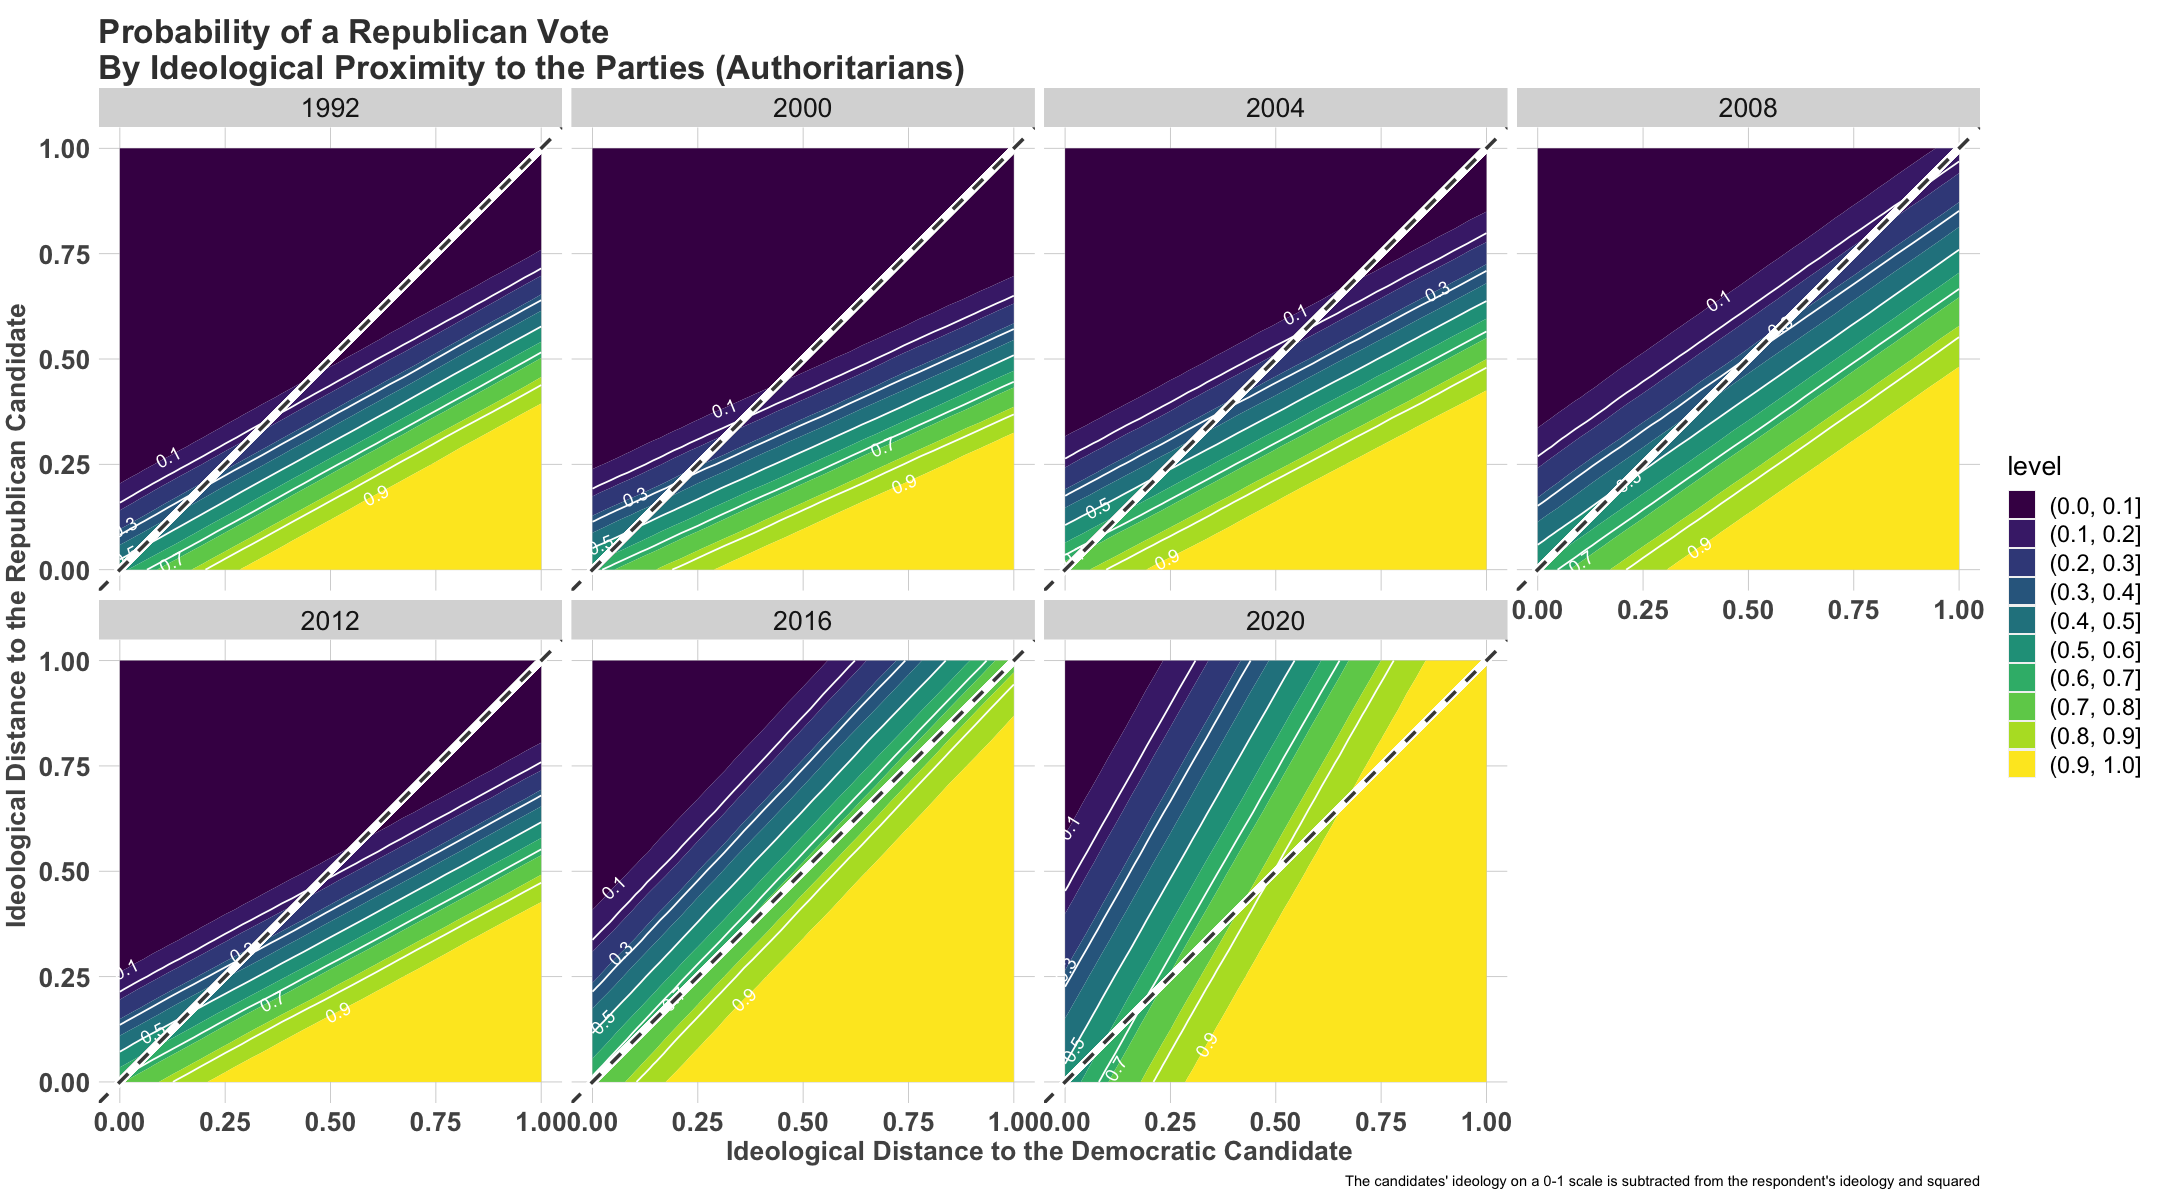

In [66]:
plot_dat %>%
  filter(authoritarianism == 1) %>%
  ggplot(aes(x = diffCD, y = diffCR, z = Probability)) +
  geom_contour_filled() +
  #Add label
  labs(title = "Non-Authoritarian") +
    geom_contour(bins = 6, colour = "white") +
      scale_x_continuous(name = "Ideological Distance to the Democratic Candidate") +
      scale_y_continuous(name = "Ideological Distance to the Republican Candidate") +
      geom_text_contour(aes(z = Probability), color = "white") +
      coord_equal() +
      facet_wrap(~year, nrow = 2) +
      ggtheme +
      ggtitle("Probability of a Republican Vote\nBy Ideological Proximity to the Parties (Authoritarians)") +
      scale_colour_manual(name = "Probability of Republican Vote") +
      labs(caption = "The candidates' ideology on a 0-1 scale is subtracted from the respondent's ideology and squared") +
      geom_segment(x = -8, xend = 8, y = -8, yend = 8, color = "white", size = 2) +
      geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "#474747", lwd = 1)




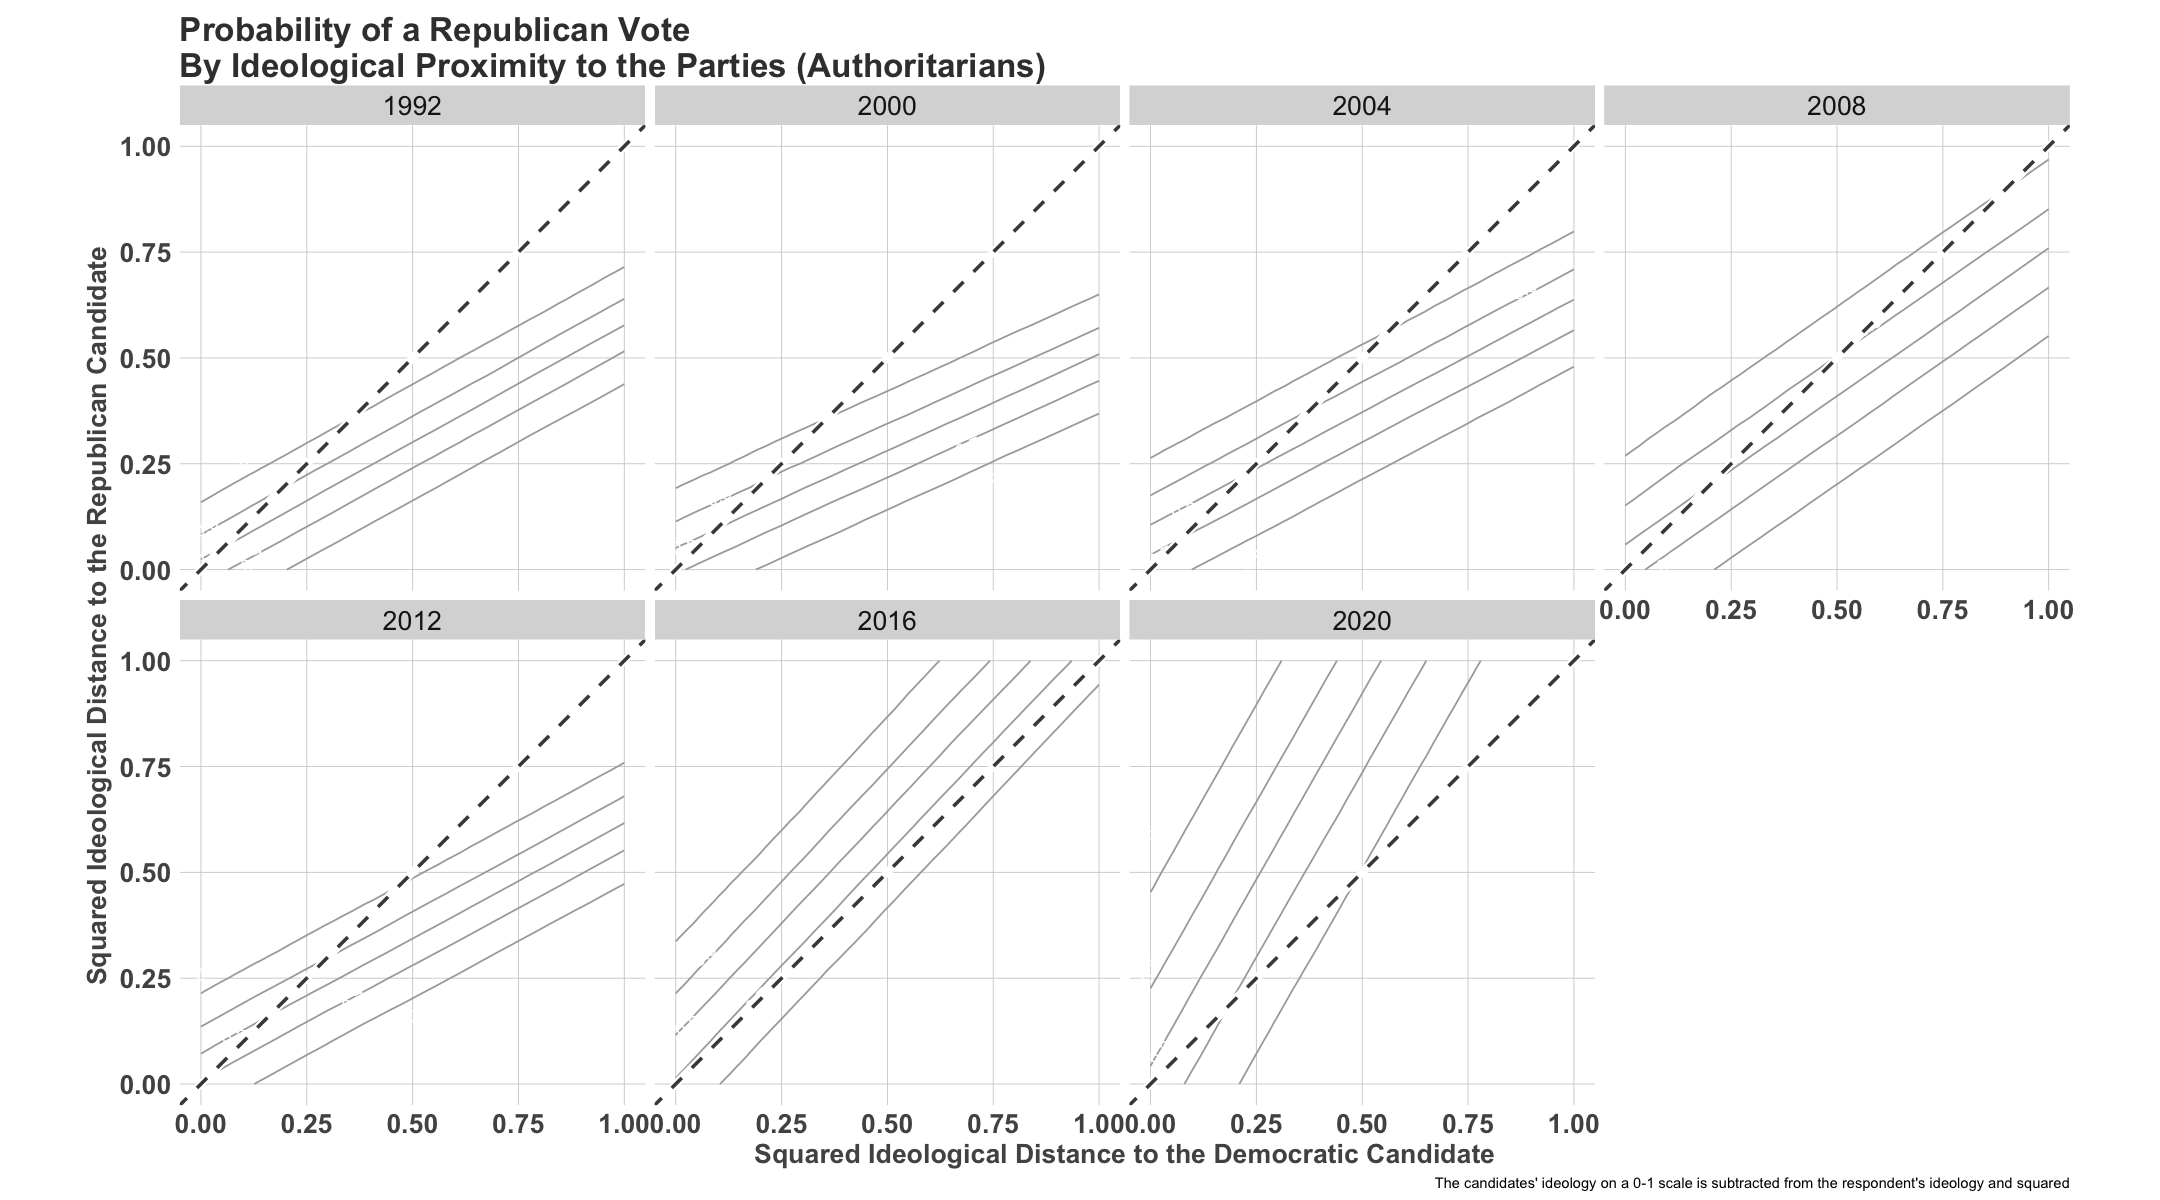

In [46]:
plot_dat %>%
  filter(authoritarianism == 1) %>%
  ggplot(aes(x = diffCD, y = diffCR, z = Probability)) +
  geom_tile(aes(fill = Probability)) +
  scale_fill_gradient2(low = "white", mid = "black", high = "grey", midpoint = 0.5) +
  geom_contour(bins = 6, colour = "darkgrey") +
  scale_x_continuous(name = "Squared Ideological Distance to the Democratic Candidate") +
  scale_y_continuous(name = "Squared Ideological Distance to the Republican Candidate") +
  geom_text_contour(aes(z = Probability), color = "white") +
  coord_equal() +
  facet_wrap(~year, nrow = 2) +
  ggtheme +
  ggtitle("Probability of a Republican Vote\nBy Ideological Proximity to the Parties (Authoritarians)") +
  scale_colour_manual(name = "Probability of Republican Vote") +
  labs(caption = "The candidates' ideology on a 0-1 scale is subtracted from the respondent's ideology and squared") +
  geom_segment(x = -8, xend = 8, y = -8, yend = 8, color = "white", size = 2) +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "#474747", lwd = 1)


In [4]:
options(repr.plot.width = 15, repr.plot.height = 10)
auth = plot_dat %>%
  filter(authoritarianism == 1) %>%
  ggplot(aes(x = sqrt(diffCD), y = sqrt(diffCR), z = Probability)) +
  geom_contour_fille(aes(fill = Probability)) +
  scale_fill_gradient2(low = "lightblue" , mid = "black", high = "red", midpoint = 0.5) +
  geom_contour(bins = 6, colour = "white") +
  scale_x_continuous(name = "Ideological Distance to the Democratic Candidate") +
  scale_y_continuous(name = "Ideological Distance to the Republican Candidate") +
  geom_text_contour(aes(z = Probability), color = "white") +
  coord_equal() +
  facet_wrap(~year, nrow = 2) +
  ggtheme +
  ggtitle("Probability of a Republican Vote\nBy Ideological Proximity to the Parties (Authoritarians)") +
  scale_colour_manual(name = "Probability of Republican Vote") +
  labs(caption = "The candidates' ideology on a 0-1 scale is subtracted from the respondent's ideology and squared") +
    geom_segment(x = -8, xend = 8, y = -8, yend = 8, color = "white", size = 2)  +
      geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "#474747", lwd = 1)



non = plot_dat %>%
    filter(authoritarianism == 0) %>%
  ggplot(aes(x = sqrt(diffCD), y = sqrt(diffCR), z = Probability)) +
  geom_contour()
  # geom_raster(aes(fill = Probability)) +
  # scale_fill_gradient2(low = "lightblue" , mid = "black", high = "red", midpoint = 0.5) +
  # geom_contour(bins = 6, colour = "white") +
  # scale_x_continuous(name = "Ideological Distance to the Democratic Candidate") +
  # scale_y_continuous(name = "Ideological Distance to the Republican Candidate") +
  # geom_text_contour(aes(z = Probability), color = "white") +
  #   coord_equal() +
  #   facet_wrap(~year, nrow = 2) +
  #   ggtheme +
  #   ggtitle("Probability of a Republican Vote\nBy Ideological Proximity to the Parties (Non-Authoritarians)") +
  #   labs(caption = "The candidates' ideology on a 0-1 scale is subtracted from the respondent's ideology and squared") +
  #       geom_segment(x = -8, xend = 8, y = -8, yend = 8, color = "white", size = 2) +
  #         geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "#474747", lwd = 1)


ERROR: Error in filter(., authoritarianism == 1): object 'plot_dat' not found


In [3]:
options(repr.plot.width = 15, repr.plot.height = 10)

auth
non

ERROR: Error in eval(expr, envir, enclos): object 'auth' not found


Here is a function to return estimated predictions.

In [42]:
return_predictions <- function(repValue, demValue) {
  plot_dat <- spatial_dat %>%
    group_by(year) %>%
    data_grid(
      diffCD = demValue^2,
      diffCR = repValue^2,
      authoritarianism = seq_range(authoritarianism, n = 2),
                female = mean(female), age = mean(age), college = mean(college), income = mean(income), catholic = mean(catholic), jewish = mean(jewish), other = mean(other)
    ) %>%
    mutate(authoritarianism2 = authoritarianism * authoritarianism) %>%
    add_linpred_draws(spatialModel) %>%
    mutate(probability = pnorm(.linpred)) %>%
    mutate("Authoritarianism" = ifelse(authoritarianism == 0, "Non Authoritarian", "Authoritarian")) %>%
    group_by(diffCD, diffCR, year, Authoritarianism) %>%
    summarize(
      probability = quantile(probability, prob = 0.5),
      max = quantile(probability, prob = 0.975),
      min = quantile(probability, prob = 0.025)
    )
  return(plot_dat)
}
return_predictions(0, 0)

`summarise()` has grouped output by 'diffCD', 'diffCR', 'year'. You can
override using the `.groups` argument.


diffCD,diffCR,year,Authoritarianism,probability,max,min
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
0,0,1992,Authoritarian,0.5710988,0.5710988,0.5710988
0,0,1992,Non Authoritarian,0.4015137,0.4015137,0.4015137
0,0,2000,Authoritarian,0.6390266,0.6390266,0.6390266
0,0,2000,Non Authoritarian,0.3558572,0.3558572,0.3558572
0,0,2004,Authoritarian,0.7427070,0.7427070,0.7427070
0,0,2004,Non Authoritarian,0.4928627,0.4928627,0.4928627
0,0,2008,Authoritarian,0.6086054,0.6086054,0.6086054
0,0,2008,Non Authoritarian,0.3577784,0.3577784,0.3577784
0,0,2012,Authoritarian,0.6883241,0.6883241,0.6883241


In [43]:
library(tidyr)
return_predictions(0.5, 0.5)




`summarise()` has grouped output by 'diffCD', 'diffCR', 'year'. You can
override using the `.groups` argument.


diffCD,diffCR,year,Authoritarianism,probability,max,min
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
0.25,0.25,1992,Authoritarian,0.2672039,0.2672039,0.2672039
0.25,0.25,1992,Non Authoritarian,0.3428807,0.3428807,0.3428807
0.25,0.25,2000,Authoritarian,0.2878104,0.2878104,0.2878104
0.25,0.25,2000,Non Authoritarian,0.2749322,0.2749322,0.2749322
0.25,0.25,2004,Authoritarian,0.4730330,0.4730330,0.4730330
0.25,0.25,2004,Non Authoritarian,0.4023040,0.4023040,0.4023040
0.25,0.25,2008,Authoritarian,0.4735896,0.4735896,0.4735896
0.25,0.25,2008,Non Authoritarian,0.3232626,0.3232626,0.3232626
0.25,0.25,2012,Authoritarian,0.3898069,0.3898069,0.3898069


In [16]:
return_predictions = function(repValue, demValue){
plot_dat <- spatial_dat %>%
  group_by(year) %>%
  data_grid(
    diffCD = demValue,
    diffCR = repValue,
    authoritarianism = seq_range(authoritarianism, n = 2)
  ) %>%
  mutate(authoritarianism2 = authoritarianism * authoritarianism) %>%
  add_linpred_draws(ch9models[["modelFit"]]) %>%
  mutate(probability = pnorm(.linpred)) %>%
  mutate("Authoritarianism" = ifelse(authoritarianism == 0, "Non Authoritarian", "Authoritarian")) %>%
  group_by(diffCD, diffCR, year, Authoritarianism) %>%
  summarize(
    probability = quantile(probability, prob = 0.5),
    max = quantile(probability, prob = 0.975),
    min = quantile(probability, prob = 0.025)
  )
  return(plot_dat)
}
return_predictions(1,1)

ERROR: Error in UseMethod("posterior_linpred"): no applicable method for 'posterior_linpred' applied to an object of class "NULL"


We may choose not to present all this, but it might still be useful in constructing our narrative. The place to start with a spatial model is to first examine trends over time, particularly since the ideology of the respondent, and perceptions may change over time. 

# The Consequences of Polarization




In [434]:
spatial_dat <- ch9models[["filteredData"]] %>%
    filter(ideologyR >= ideologyD) %>%
    select(vote, ideology, ideologyD, ideologyR,  authoritarianism, authoritarianism2, female, age, college, income, jewish, catholic, other, year) %>%
    na.omit() %>%
    mutate(polarization = (ideologyR - ideologyD) )

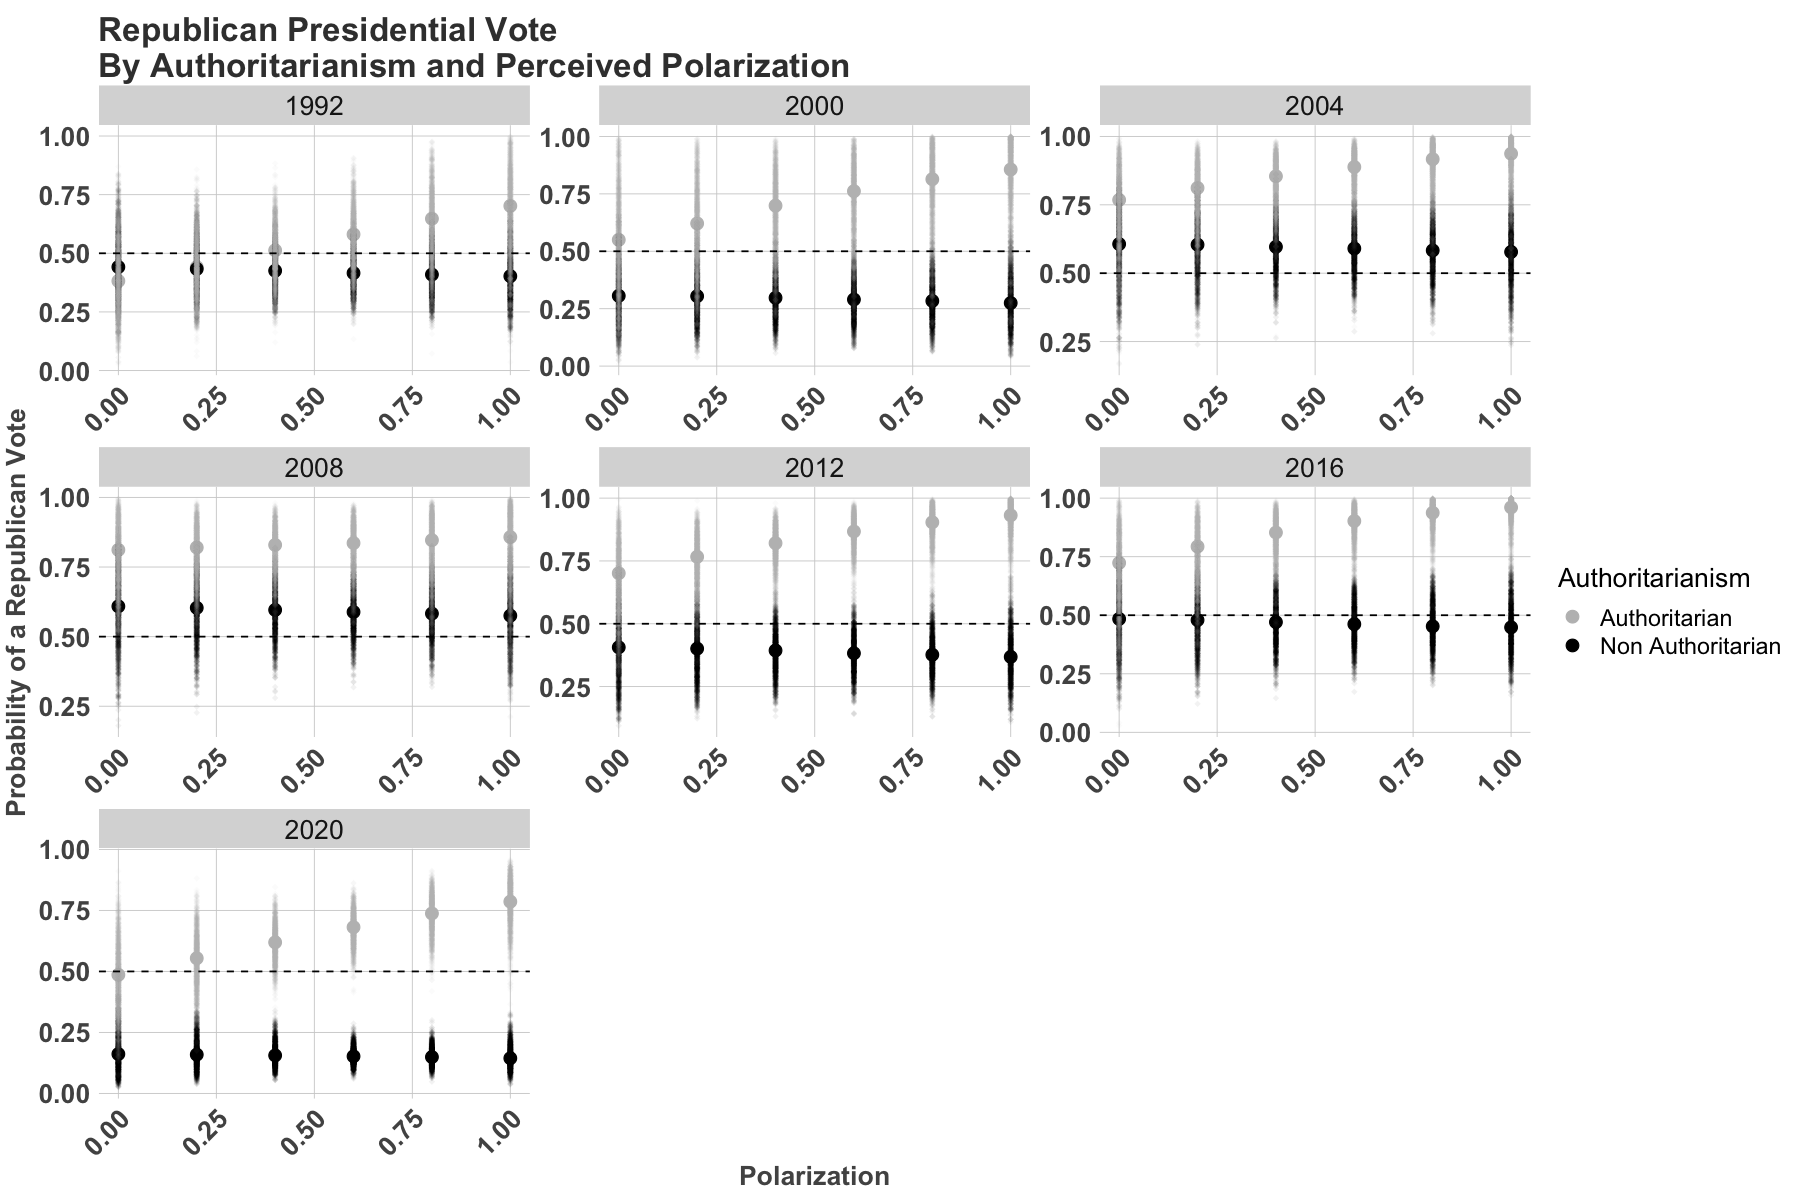

In [435]:
options(repr.plot.width = 15, repr.plot.height = 10)

spatial_dat %>%
  group_by(year) %>%
  data_grid(
    female = mean(female), age = mean(age), college = mean(college), income = mean(income), catholic = mean(catholic), jewish = mean(jewish), other = mean(other), ideology = mean(ideology),
    polarization = seq_range(polarization, n = 6   ),
    authoritarianism = seq_range(authoritarianism, n = 2)
  ) %>%
  mutate(authoritarianism2 = authoritarianism * authoritarianism) %>%
  add_linpred_draws(ch9models[["polarizationMod"]]) %>%
  mutate(probability = pnorm(.linpred)) %>%
  # group_by(diffCD, diffCR, year, authoritarianism) %>%
  # summarize(
  #   mean = quantile(probability, prob = 0.5),
  #   min = quantile(probability, prob = 0.025),
  #   max = quantile(probability, prob = 0.975)
  # ) %>%
  mutate("Authoritarianism" = ifelse(authoritarianism == 0, "Non Authoritarian", "Authoritarian")) %>%

  ggplot(aes(x = polarization, y = probability, colour = Authoritarianism)) +
    facet_wrap(~year, scales = "free") +
    stat_summary(fun = median, geom = "point", shape = 20, size = 5) +
    ggtheme +
    geom_point(size = 1.5, alpha = 0.05, shape = 18) +
    ggtitle("Republican Presidential Vote\nBy Authoritarianism and Perceived Polarization") +
    theme(legend.key = element_blank()) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    labs(y = "Probability of a Republican Vote", x = "Polarization") +
    scale_color_manual(values = c("grey", "black")) +
    geom_hline(yintercept = 0.5, colour = "black", linetype = "dashed")


In [436]:
spatial_dat %>%
  group_by(year) %>%
  data_grid(
    female = mean(female), age = mean(age), college = mean(college), income = mean(income), catholic = mean(catholic), jewish = mean(jewish), other = mean(other), ideology = mean(ideology),
    polarization = seq_range(polarization, n = 2   ),
    authoritarianism = seq_range(authoritarianism, n = 2)
  ) %>%
  mutate(authoritarianism2 = authoritarianism * authoritarianism) %>%
  add_linpred_draws(ch9models[["polarizationMod"]]) %>%
  mutate(probability = pnorm(.linpred)) %>%
  group_by(polarization, year, authoritarianism) %>%
  summarize(
    mean = quantile(probability, prob = 0.5),
    min = quantile(probability, prob = 0.025),
    max = quantile(probability, prob = 0.975)
  ) %>%
  mutate("Authoritarianism" = ifelse(authoritarianism == 0, "Non Authoritarian", "Authoritarian"))


`summarise()` has grouped output by 'polarization', 'year'. You can override
using the `.groups` argument.


polarization,year,authoritarianism,mean,min,max,Authoritarianism
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,1992,0,0.4415979,0.21505810,0.6980580,Non Authoritarian
0,1992,1,0.3819608,0.12194353,0.6894644,Authoritarian
0,2000,0,0.3059829,0.10616225,0.5815523,Non Authoritarian
0,2000,1,0.5499109,0.13811972,0.9462411,Authoritarian
0,2004,0,0.6065745,0.34176200,0.8299790,Non Authoritarian
0,2004,1,0.7678656,0.37382623,0.9522971,Authoritarian
0,2008,0,0.6089133,0.33301600,0.8315369,Non Authoritarian
0,2008,1,0.8116045,0.52179904,0.9670070,Authoritarian
0,2012,0,0.4062717,0.16486796,0.6736857,Non Authoritarian


`summarise()` has grouped output by 'polarization'. You can override using the
`.groups` argument.


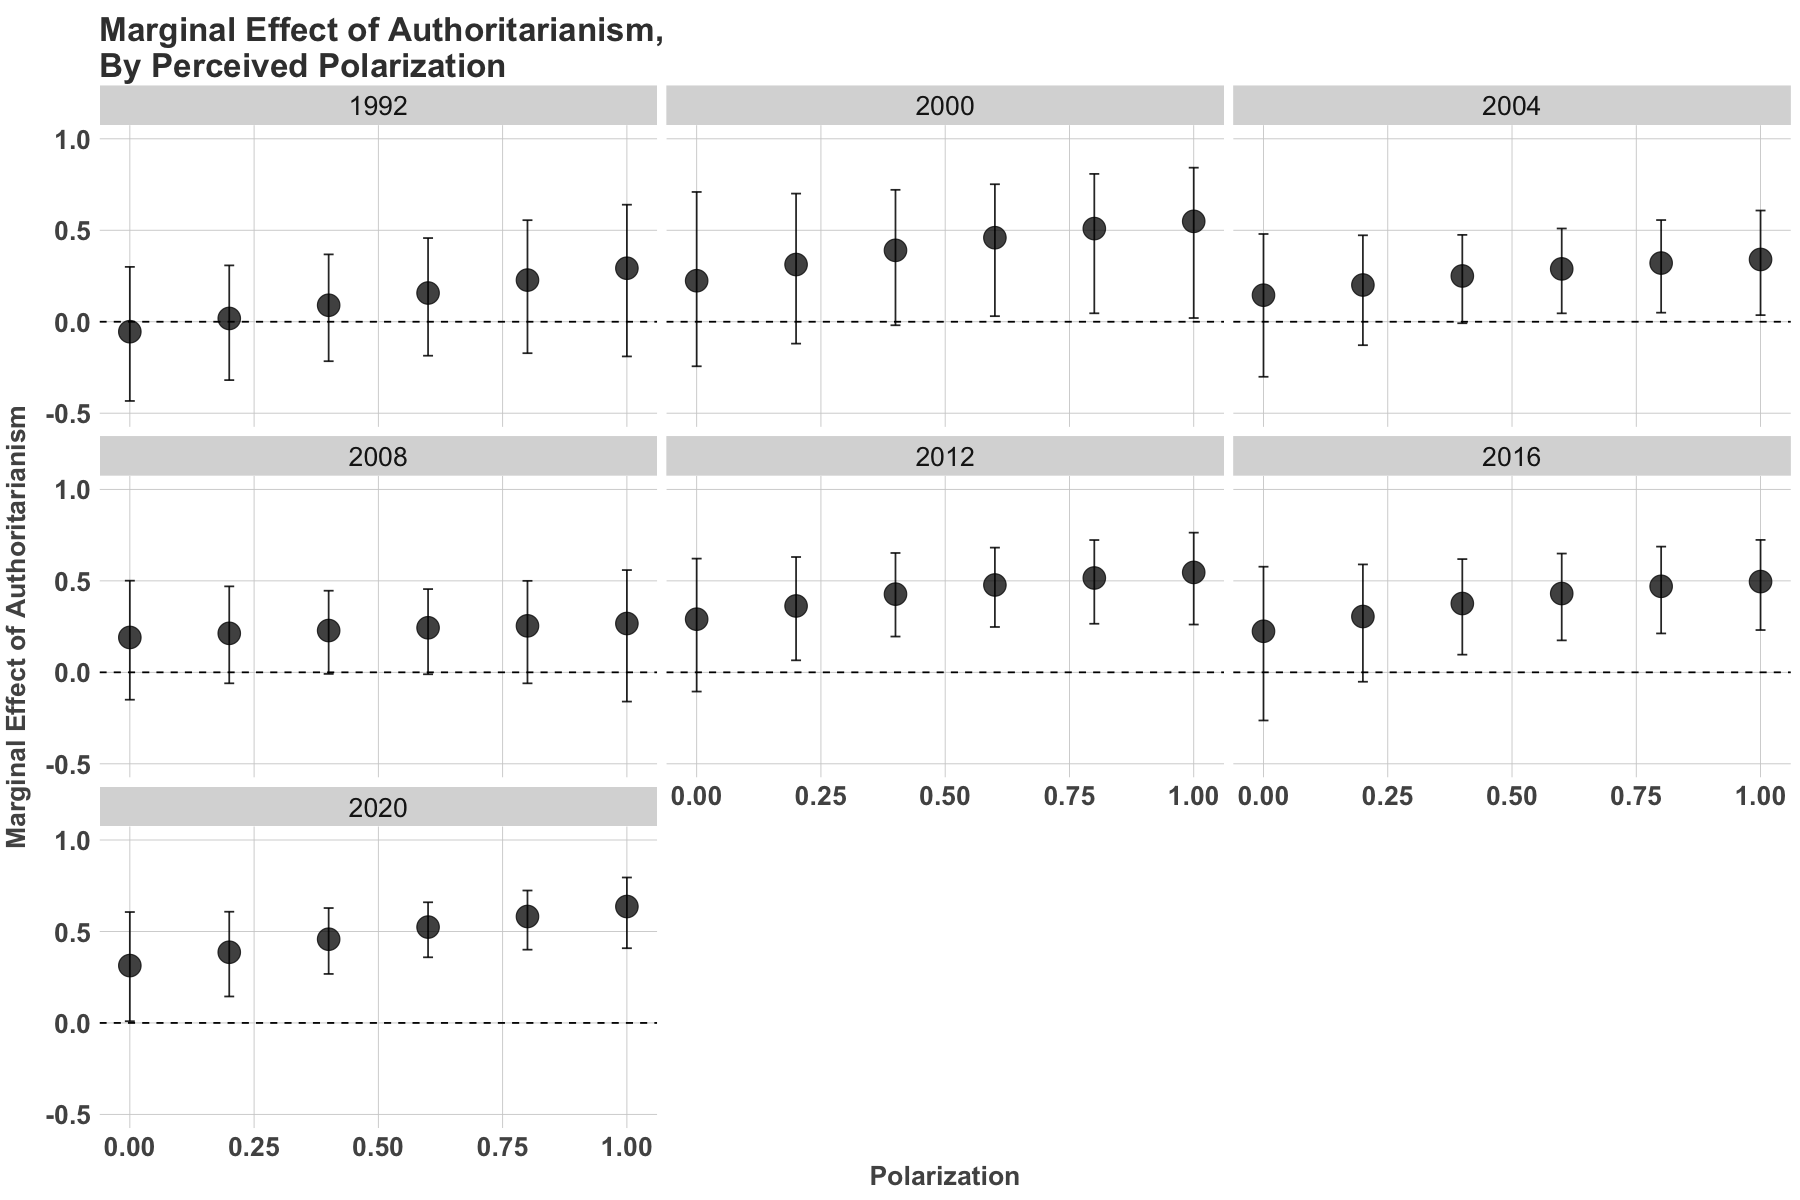

In [437]:
a = spatial_dat %>%
  group_by(year) %>%
  data_grid(
    female = mean(female), age = mean(age), college = mean(college), income = mean(income), catholic = mean(catholic), jewish = mean(jewish), other = mean(other),ideology = mean(ideology),
    polarization = seq_range(polarization, n = 6 ),
    authoritarianism = 1
  ) %>%
  mutate(authoritarianism2 = authoritarianism * authoritarianism) %>%
  add_linpred_draws(ch9models[["polarizationMod"]]) %>%
  mutate(probability = pnorm(.linpred))


b = spatial_dat %>%
   group_by(year) %>%
   data_grid(
     female = mean(female), age = mean(age), college = mean(college), income = mean(income), catholic = mean(catholic), jewish = mean(jewish), other = mean(other), ideology = mean(ideology),
     polarization = seq_range(polarization, n = 6),
     authoritarianism = 0
   ) %>%
   mutate(authoritarianism2 = authoritarianism * authoritarianism) %>%
  add_linpred_draws(ch9models[["polarizationMod"]]) %>%
   mutate(probability = pnorm(.linpred))
difference <- a$probability - b$probability
a$difference <- difference

a %>%
  group_by(polarization, year) %>%
  summarize(
    mean = quantile(difference, prob = 0.5),
    min = quantile(difference, prob = 0.025),
    max = quantile(difference, prob = 0.975)
  ) %>%
   ggplot(aes(
     x = polarization,
     y = mean, ymin = min,
     ymax = max,
   )) +
   facet_wrap(~year) +
     geom_point(size = 6, alpha = 0.75) +
     geom_errorbar(width = 0.02, alpha = 0.85, position = position_dodge(width = 0.5)) +
     ggtitle("Marginal Effect of Authoritarianism,\nBy Perceived Polarization") +
     ggtheme +
     scale_y_continuous("Marginal Effect of Authoritarianism", limits = c(-0.5, 1)) +
     geom_hline(yintercept = 0, colour = "black", linetype = "dashed") +
     scale_colour_manual(name = "College", values = c("darkgrey", "black")) +
 labs( x = "Polarization")

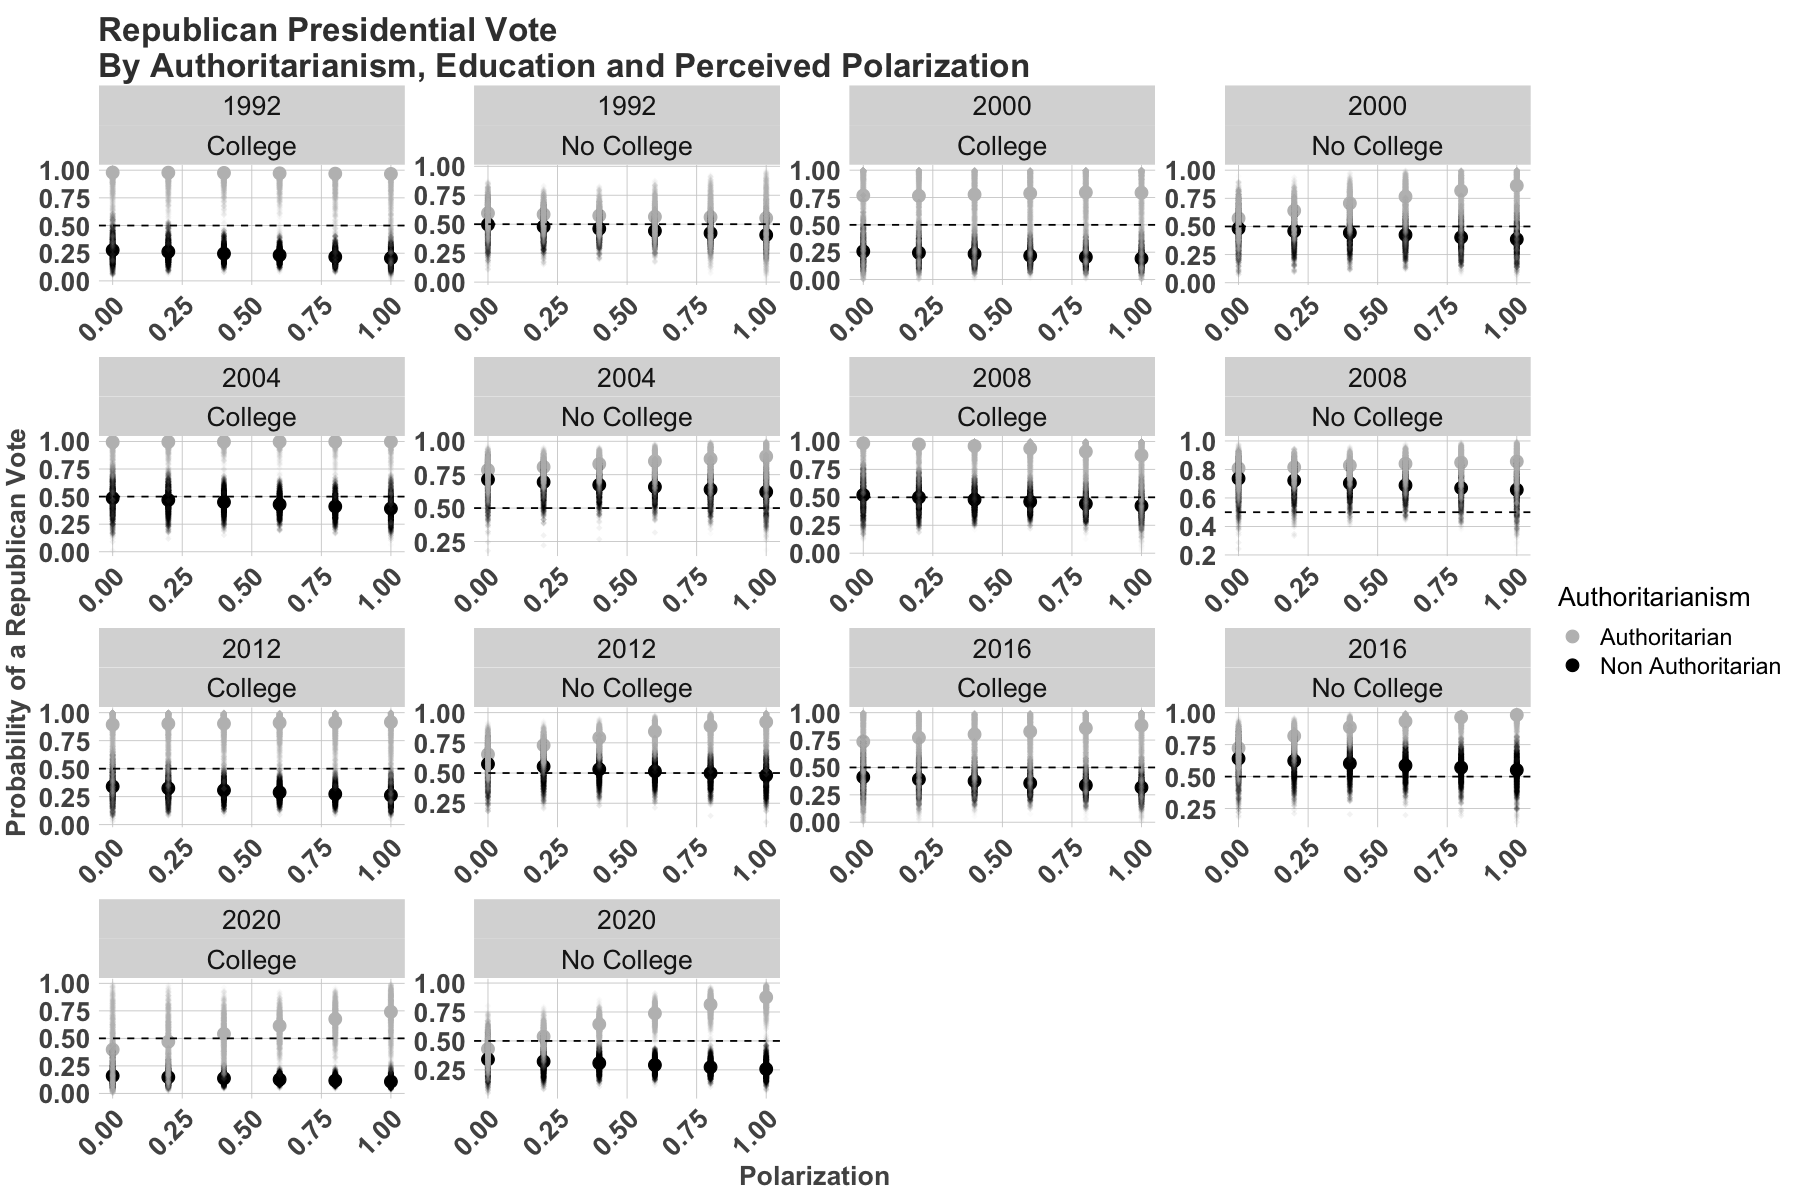

In [438]:
options(repr.plot.width = 15, repr.plot.height = 10)

spatial_dat %>%
  group_by(year) %>%
  data_grid(
    female = mean(female), age = mean(age), college = c(0,1), income = mean(income), catholic = mean(catholic), jewish = mean(jewish), other = mean(other), ideology = mean(ideology),
    polarization = seq_range(polarization, n = 6),
    authoritarianism = seq_range(authoritarianism, n = 2)
  ) %>%
  mutate(authoritarianism2 = authoritarianism * authoritarianism) %>%
  add_linpred_draws(ch9models[["modelEducPolarization"]]) %>%
  mutate(probability = pnorm(.linpred)) %>%
  mutate("Authoritarianism" = ifelse(authoritarianism == 0, "Non Authoritarian", "Authoritarian")) %>%
  mutate(College = ifelse(college == 0, "No College", "College")) %>%

  ggplot(aes(x = polarization, y = probability, colour = Authoritarianism)) +
  facet_wrap(~year + College, scales = "free") +
  stat_summary(fun = median, geom = "point", shape = 20, size = 5) +
  ggtheme +
  geom_point(size = 1.5, alpha = 0.05, shape = 18) +
  ggtitle("Republican Presidential Vote\nBy Authoritarianism, Education and Perceived Polarization") +
  theme(legend.key = element_blank()) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(y = "Probability of a Republican Vote", x = "Polarization") +
  scale_color_manual(values = c("grey", "black")) +
  geom_hline(yintercept = 0.5, colour = "black", linetype = "dashed")

In [ ]:
a <- spatial_dat %>%
  group_by(year) %>%
  data_grid(
    female = mean(female), age = mean(age), college = c(0,1), income = mean(income), catholic = mean(catholic), jewish = mean(jewish), other = mean(other), ideology = mean(ideology),
    polarization = seq_range(polarization, n = 6),
    authoritarianism = 1
  ) %>%
  mutate(authoritarianism2 = authoritarianism * authoritarianism) %>%
  add_linpred_draws(ch9models[["modelEducPolarization"]]) %>%
  mutate(probability = pnorm(.linpred))


b <- spatial_dat %>%
  group_by(year) %>%
  data_grid(
    female = mean(female), age = mean(age), college =c(0,1), income = mean(income), catholic = mean(catholic), jewish = mean(jewish), other = mean(other), ideology = mean(ideology),
    polarization = seq_range(polarization, n = 6),
    authoritarianism = 0
  ) %>%
  mutate(authoritarianism2 = authoritarianism * authoritarianism) %>%
  add_linpred_draws(ch9models[["modelEducPolarization"]]) %>%
  mutate(probability = pnorm(.linpred))
difference <- a$probability - b$probability
a$difference <- difference
a$College = ifelse(a$college == 0, "No College", "College")

a %>%
  group_by(polarization, authoritarianism, College, year) %>%
  summarize(
    mean = quantile(difference, prob = 0.5),
    min = quantile(difference, prob = 0.025),
    max = quantile(difference, prob = 0.975)
  ) %>%
  ggplot(aes(
    x = polarization,
    y = mean, ymin = min,
    ymax = max,
  )) +
  facet_wrap(~year + College) +
  geom_point(size = 6, alpha = 0.75, position = position_dodge(width = 0.5)) +
  geom_errorbar(width = 0.02, alpha = 0.85, position = position_dodge(width = 0.5)) +
  ggtitle("Marginal Effect of Authoritarianism,\nBy Perceived Polarization, Education") +
  ggtheme +
  scale_y_continuous("Marginal Effect of Authoritarianism", limits = c(-0.5, 1)) +
  geom_hline(yintercept = 0, colour = "black", linetype = "dashed") +
  scale_colour_manual(name = "College", values = c("darkgrey", "black")) +
  labs(x = "Polarization")